In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("/content/MLSTP.csv")

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Unnamed: 8
0,female,group B,bachelor's degree,standard,none,72,72,74,NaN
1,female,group C,some college,standard,completed,69,90,88,NaN
2,female,group B,master's degree,standard,none,90,95,93,NaN
3,male,group A,associate's degree,free/reduced,none,47,57,44,NaN
4,male,group C,some college,standard,none,48,58,45,NaN


In [7]:
df.shape

(4004, 9)

In [8]:
df.isnull().sum()

gender                            0
race/ethnicity                    0
parental level of education       0
lunch                             0
test preparation course           0
math score                        0
reading score                     0
writing score                     0
Unnamed: 8                     4003
dtype: int64

In [9]:
df.duplicated().sum()

1113

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       4004 non-null   object
 1   race/ethnicity               4004 non-null   object
 2   parental level of education  4004 non-null   object
 3   lunch                        4004 non-null   object
 4   test preparation course      4004 non-null   object
 5   math score                   4004 non-null   int64 
 6   reading score                4004 non-null   int64 
 7   writing score                4004 non-null   int64 
 8   Unnamed: 8                   1 non-null      object
dtypes: int64(3), object(6)
memory usage: 281.7+ KB


In [11]:
df.nunique()

gender                           2
race/ethnicity                   5
parental level of education      6
lunch                            2
test preparation course          2
math score                     100
reading score                   95
writing score                   95
Unnamed: 8                       1
dtype: int64

In [12]:
print("Categories in 'gender' variable:  ",end=" ")
print(df["gender"].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df["race/ethnicity"].unique())

print("Categories in 'parental level of education' variable:  ",end=" ")
print(df["parental level of education"].unique())

print("Categories in 'lunch' variable:  ",end=" ")
print(df["lunch"].unique())

print("Categories in 'test preparation course' variable:  ",end=" ")
print(df["test preparation course"].unique())

Categories in 'gender' variable:   ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'test preparation course' variable:   ['none' 'completed']


In [13]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != "object"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "object"]

print("We have {} numerical features: {}".format(len(numeric_features),numeric_features))
print("We have {} categorical features: {}".format(len(categorical_features),categorical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 6 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'Unnamed: 8']


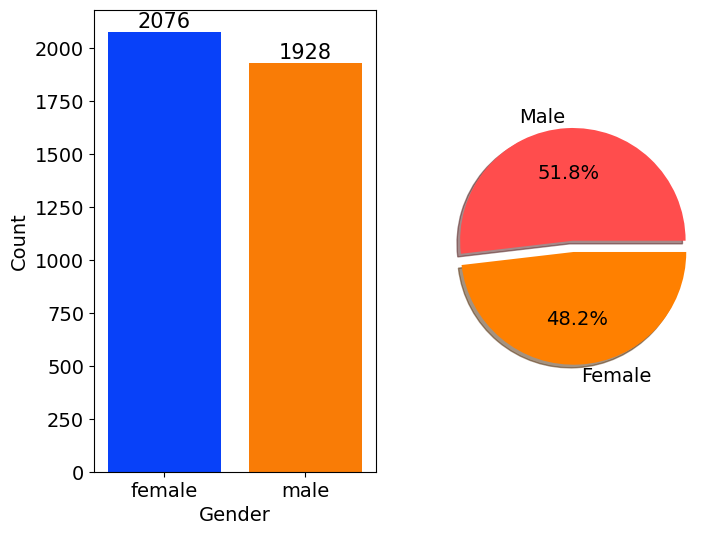

In [14]:
f,ax=plt.subplots(1,2,figsize=(8,6))

sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

ax[0].set_xlabel('Gender', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].tick_params(labelsize=14)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'], textprops={'fontsize': 14})

plt.show()


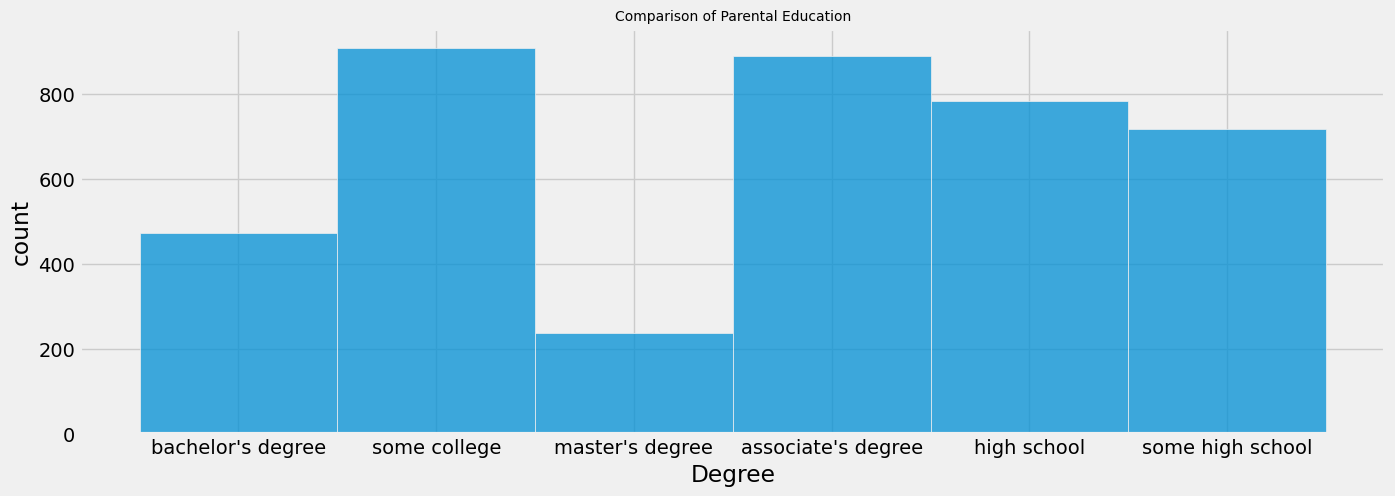

In [15]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')
sns.histplot(df["parental level of education"], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 10)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


X = df.drop(columns="math score", axis=1)
y = df["math score"]

In [21]:


num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [22]:
X = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
}

In [24]:
model_list = []
r2_list = []

In [25]:
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(f"Model: {name}")
    model_list.append(name)

    print('Model performance for Training set')
    print(f"- Root Mean Squared Error: {model_train_rmse:.4f}")
    print(f"- Mean Squared Error: {model_train_mse:.4f}")
    print(f"- Mean Absolute Error: {model_train_mae:.4f}")
    print(f"- R2 Score: {model_train_r2:.4f}")

    print('----------------------------------')
    print('Model performance for Test set')
    print(f"- Root Mean Squared Error: {model_test_rmse:.4f}")
    print(f"- Mean Squared Error: {model_test_mse:.4f}")
    print(f"- Mean Absolute Error: {model_test_mae:.4f}")
    print(f"- R2 Score: {model_test_r2:.4f}")

    r2_list.append(model_test_r2)
    print('='*35)
    print('\n')

Model: Linear Regression
Model performance for Training set
- Root Mean Squared Error: 10.6215
- Mean Squared Error: 112.8172
- Mean Absolute Error: 7.1911
- R2 Score: 0.6532
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 10.1325
- Mean Squared Error: 102.6678
- Mean Absolute Error: 7.0370
- R2 Score: 0.6782


Model: K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 9.3731
- Mean Squared Error: 87.8558
- Mean Absolute Error: 6.4121
- R2 Score: 0.7299
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11.0274
- Mean Squared Error: 121.6031
- Mean Absolute Error: 7.8821
- R2 Score: 0.6188


Model: Decision Tree
Model performance for Training set
- Root Mean Squared Error: 3.5265
- Mean Squared Error: 12.4359
- Mean Absolute Error: 0.8217
- R2 Score: 0.9618
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 13.0423
- Mean Squar

In [26]:
results_df = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by="R2_Score", ascending=False)
print(results_df)

              Model Name  R2_Score
0      Linear Regression  0.678193
1  K-Neighbors Regressor  0.618842
2          Decision Tree  0.466828


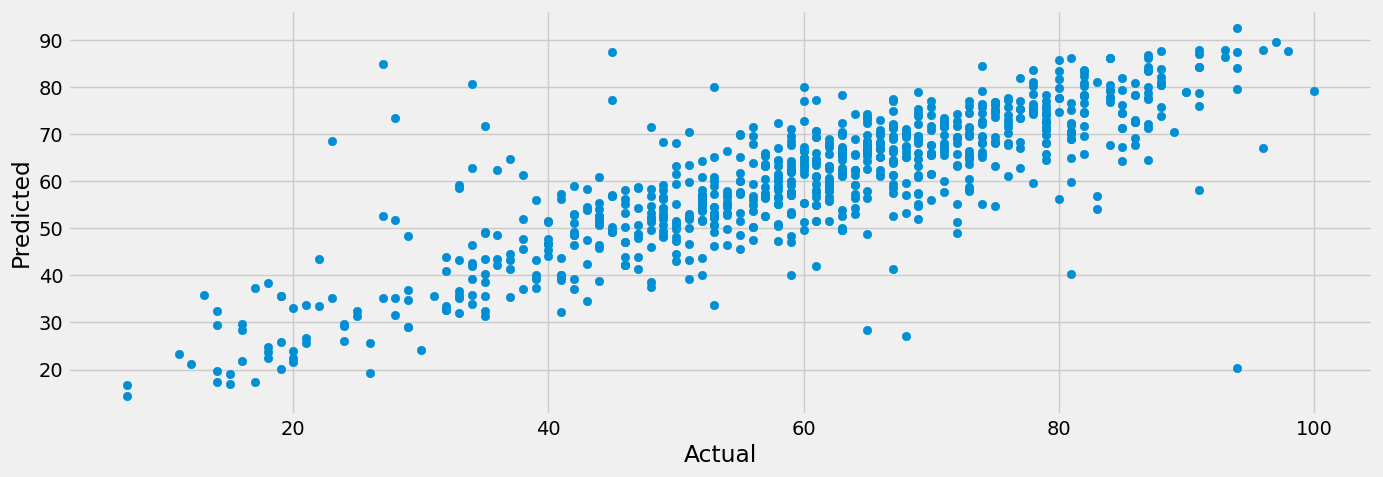

In [28]:
# Plotting the best model's predictions
best_model_name = results_df.iloc[0, 0]
best_model = models[best_model_name]
y_pred = best_model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


      Actual Value  Predicted Value  Difference
682             46         55.15625    -9.15625
2771            58         58.93750    -0.93750
2073            63         61.56250     1.43750
1163            49         59.25000   -10.25000
3731            73         77.03125    -4.03125
...            ...              ...         ...
621             62         60.75000     1.25000
1454            52         54.81250    -2.81250
3358            56         47.46875     8.53125
1740            61         42.03125    18.96875
1736            67         41.25000    25.75000

[801 rows x 3 columns]


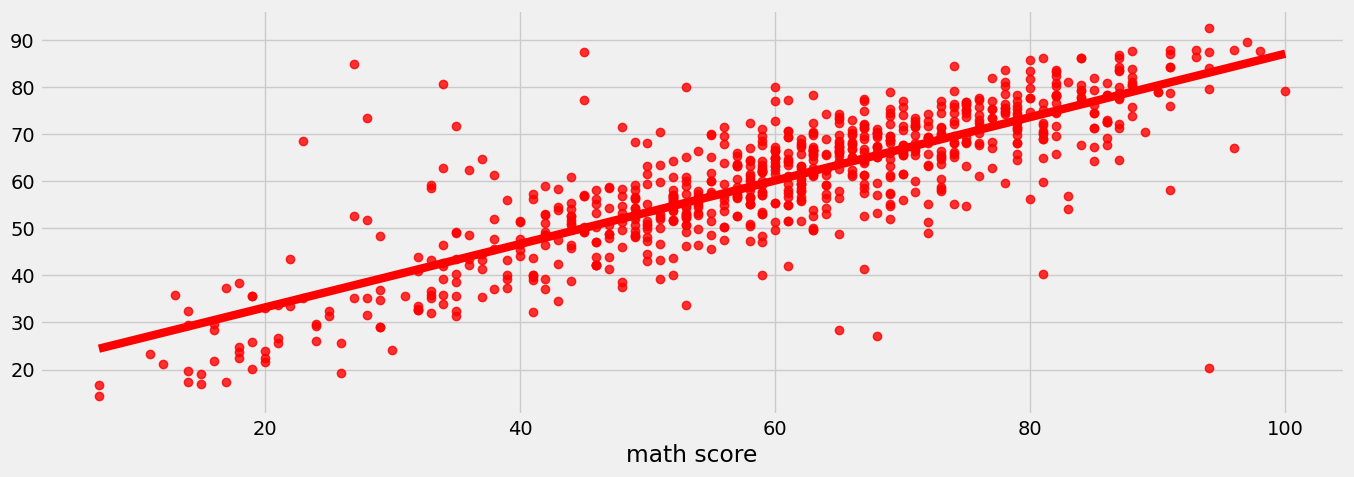

In [33]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test - y_pred})
print(pred_df)

# Saving the best model
with open('best_model.pkl', 'wb') as files:
    pickle.dump(best_model, files)

# Loading the saved model (example)
with open('best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)